In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
file = r'C:\Users\Sara\Dropbox (Politecnico Di Torino Studenti)\Aplanet_\all_parts.xlsx'

xl1= pd.ExcelFile(file)      # Load spreadsheet
df1 = xl1.parse('Sheet1')    # Load a sheet into a DataFrame by name: df1
df1.index  = np.arange(len(df1))

In [3]:
pd.set_option('display.max_columns', None)
df1

,participant.id_in_session,mod,participant.code,participant.time_started,player.inequality_perception,What type of society do you think is Spain today – which diagram comes the closest?,player.inequality_wish,What do you think Spain ought to be like – which would you prefer?,player.income_distribution,How fair do you think the wealth distribution is in your country?,player.postal_code,participant._municipality,The participant lives in Madrid:,player.driving_license,Do you have a driver license?,player.access_to_car,Do you own or have access to a car?,player.car_type,What kind of vehicle do you have access to? If you have access to multiple vehicles choose the one you use the most.,player.access_to_bike,Do you own or have access to a bike (electric or regular)?,player.access_to_motorbyke,Do you own or have access to a motorbyke?,player.access_to_scooter,Do you own or have access to a e-scooter?,player.employ_status,What is your employment status?,player.trip_destination,player.trip_purpose,What is the purpose/destination of this trip?,player.trip_other,player.trip_moment,At what time of the day do you typically travel?,player.trip_mode,By which mode do you travel with during this trip? If you travel with multiple modes choose the mode that takes you the longest time.,player.mode_other,player.trip_traffic,How are the traffic conditions normally on the trip?,player.trip_time,What is the approximate travel time of this trip (one way)?,player.trip_cost,"What is the approximate cost of this trip (fuel, road tolls, parking, ticket price etc.), one way? If you are traveling by public transport and have a period ticket, please consider the average price per trip.",player.trip_alternative_mode,"If you were to make this trip using a different mode of travel than your usual mode, which would be the best alternative?",player.trip_alternative_rate,How would you rate your alternative?,player.trip_alternative_justification,player.control_question,Answer to control question:,player.alternative1,Alternative 1,player.alternative2,Alternative 2,player.alternative3,Alternative 3,player.alternative4,Alternative 4,player.alternative5,Alternative 5,1_policy_choice,1_What is your preferred policy type?,1_Price_UR_A,"1_A_Price in urban areas, rush hour",1_Price_UN_A,"1_A_Price in urban areas, outside rush hour",1_Price_O_A,1_A_Price outside urban areas,1_EV_A,1_A_Price for electric vehicles,1_Revenue_A,1_A_Use of revenue,1_Price_UR_B,"1_B_Price in urban areas, rush hour",1_Price_UN_B,"1_B_Price in urban areas, outside rush hour",1_Price_O_B,1_B_Price outside urban areas,1_EV_B,1_B_Price for electric vehicles,1_Revenue_B,1_B_Use of revenue,2_policy_choice,2_What is your preferred policy type?,2_Price_UR_A,"2_A_Price in urban areas, rush hour",2_Price_UN_A,"2_A_Price in urban areas, outside rush hour",2_Price_O_A,2_A_Price outside urban areas,2_EV_A,2_A_Price for electric vehicles,2_Revenue_A,2_A_Use of revenue,2_Price_UR_B,"2_B_Price in urban areas, rush hour",2_Price_UN_B,"2_B_Price in urban areas, outside rush hour",2_Price_O_B,2_B_Price outside urban areas,2_EV_B,2_B_Price for electric vehicles,2_Revenue_B,2_B_Use of revenue,3_policy_choice,3_What is your preferred policy type?,3_Price_UR_A,"3_A_Price in urban areas, rush hour",3_Price_UN_A,"3_A_Price in urban areas, outside rush hour",3_Price_O_A,3_A_Price outside urban areas,3_EV_A,3_A_Price for electric vehicles,3_Revenue_A,3_A_Use of revenue,3_Price_UR_B,"3_B_Price in urban areas, rush hour",3_Price_UN_B,"3_B_Price in urban areas, outside rush hour",3_Price_O_B,3_B_Price outside urban areas,3_EV_B,3_B_Price for electric vehicles,3_Revenue_B,3_B_Use of revenue,4_policy_choice,4_What is your preferred policy type?,4_Price_UR_A,"4_A_Price in urban areas, rush hour",4_Price_UN_A,"4_A_Price in urban areas, outside rush hour",4_Price_O_A,4_A_Price outside urban areas,4_EV_A,4_A_Price for electric vehicles,4_Revenue_A,4_A_Use of revenue,4_Price_UR_B,"4_B_Price in urban areas, rush hour",4_Price_UN_B,"4_

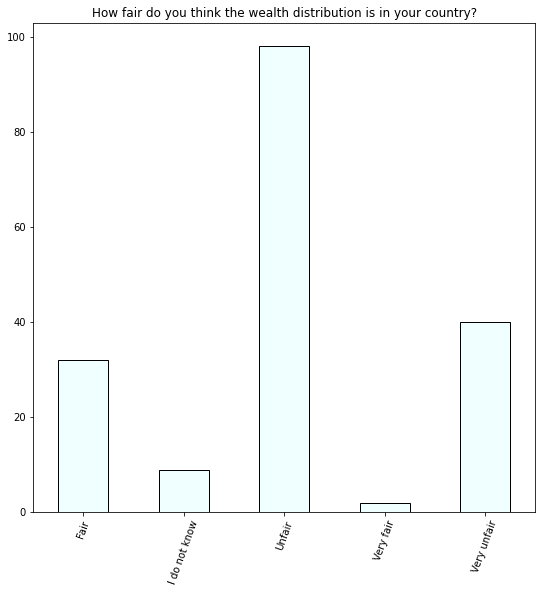

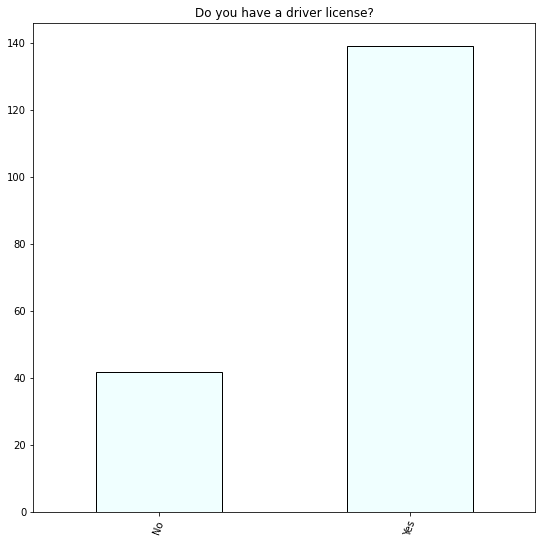

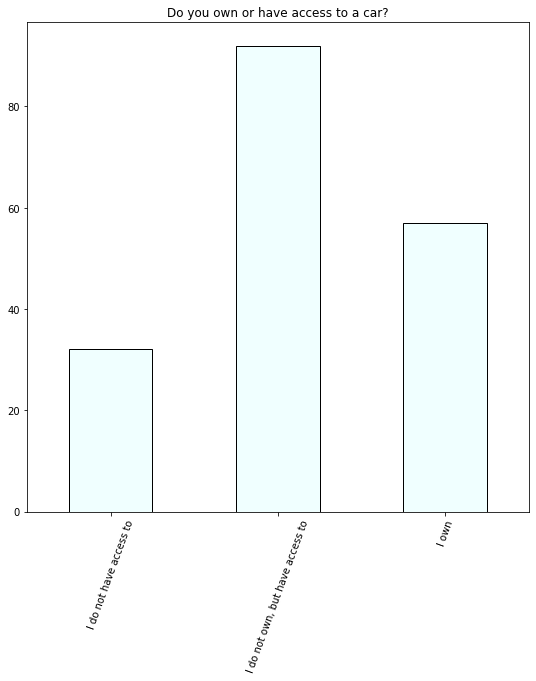

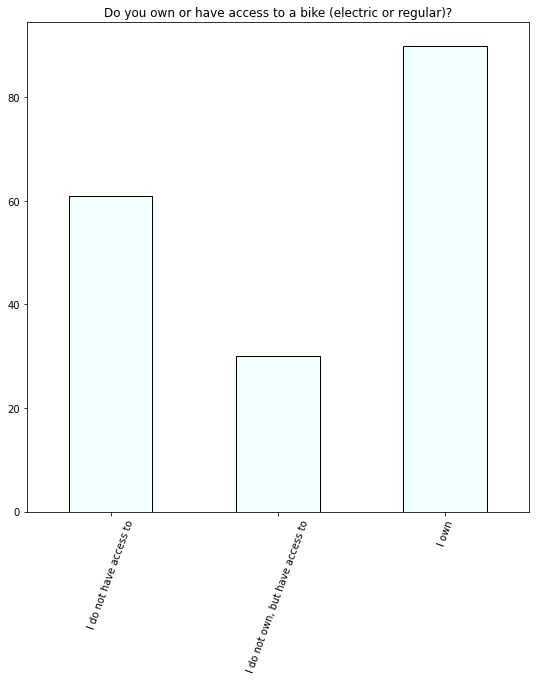

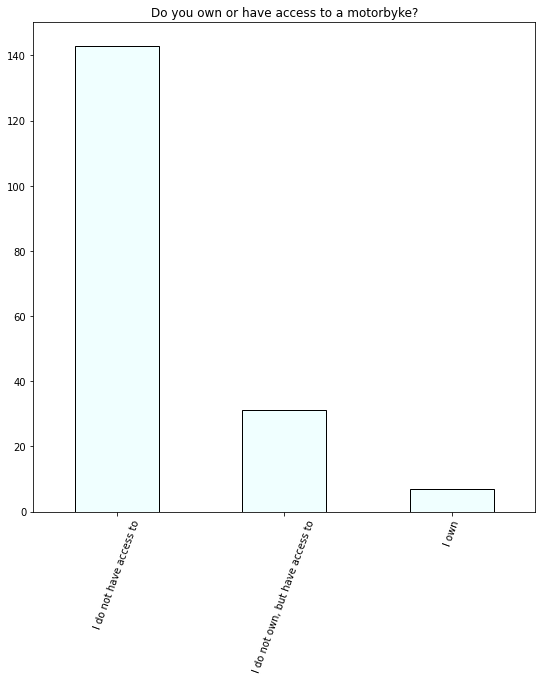

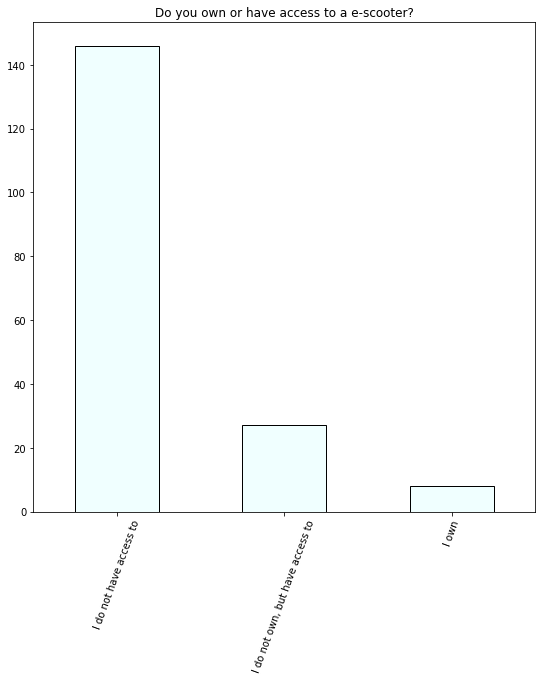

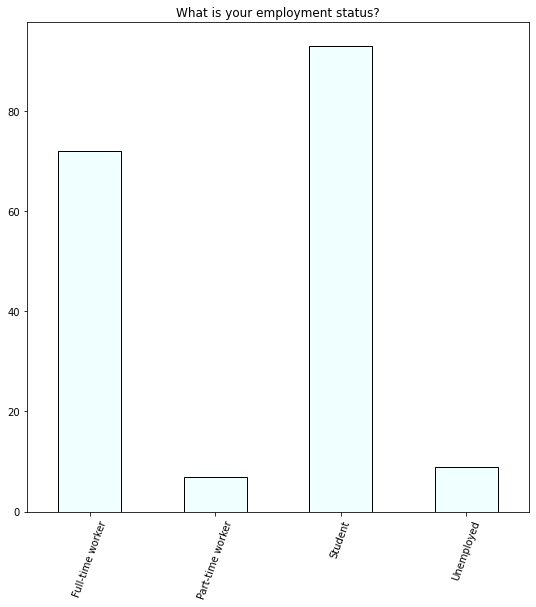

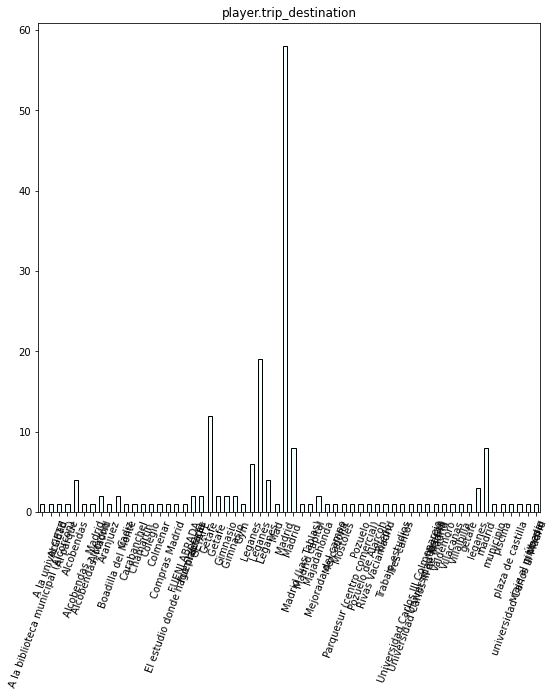

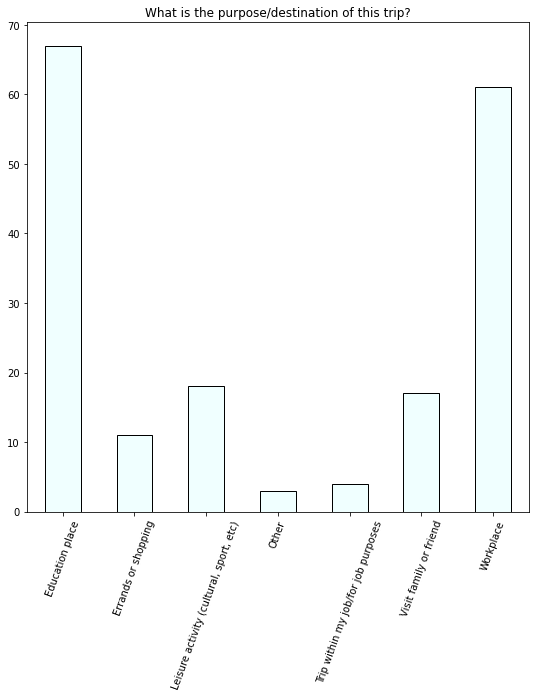

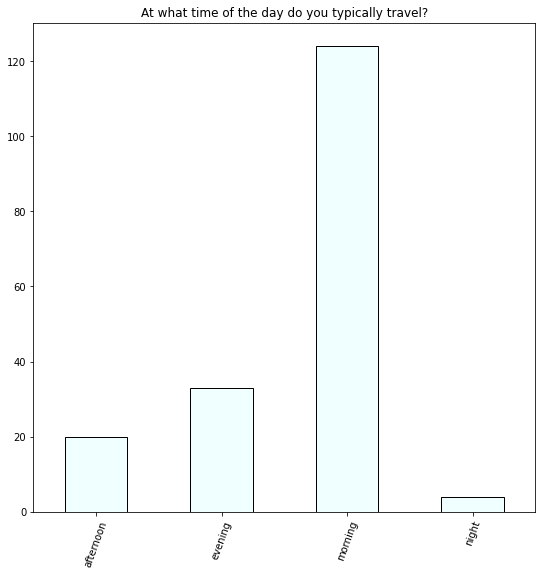

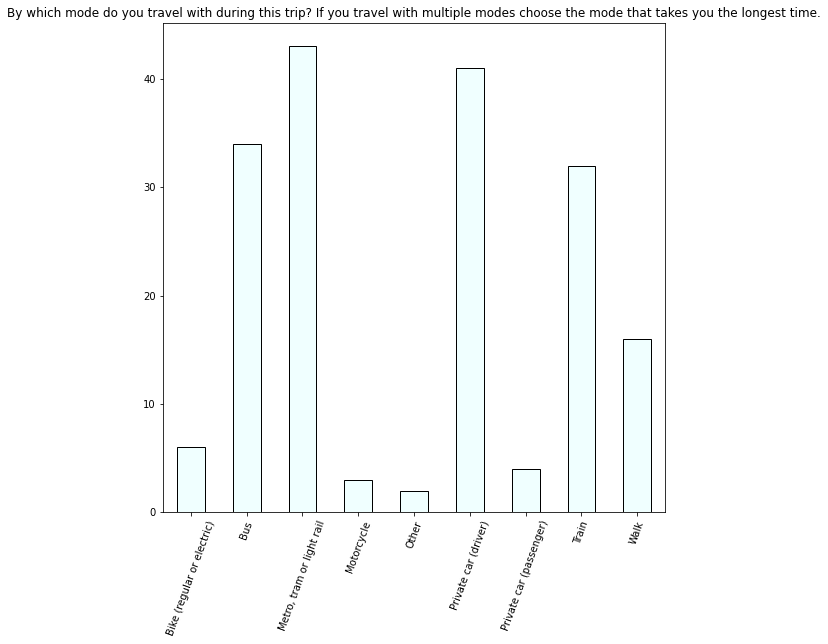

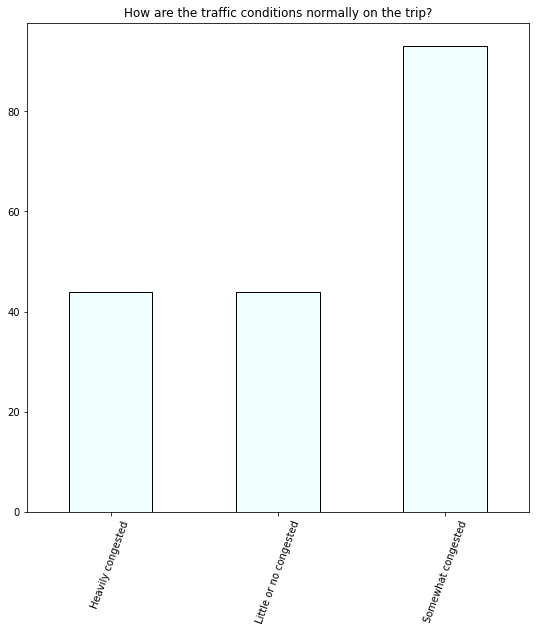

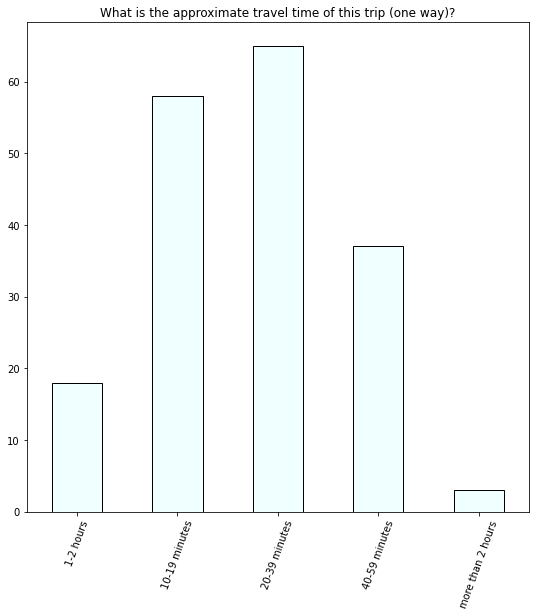

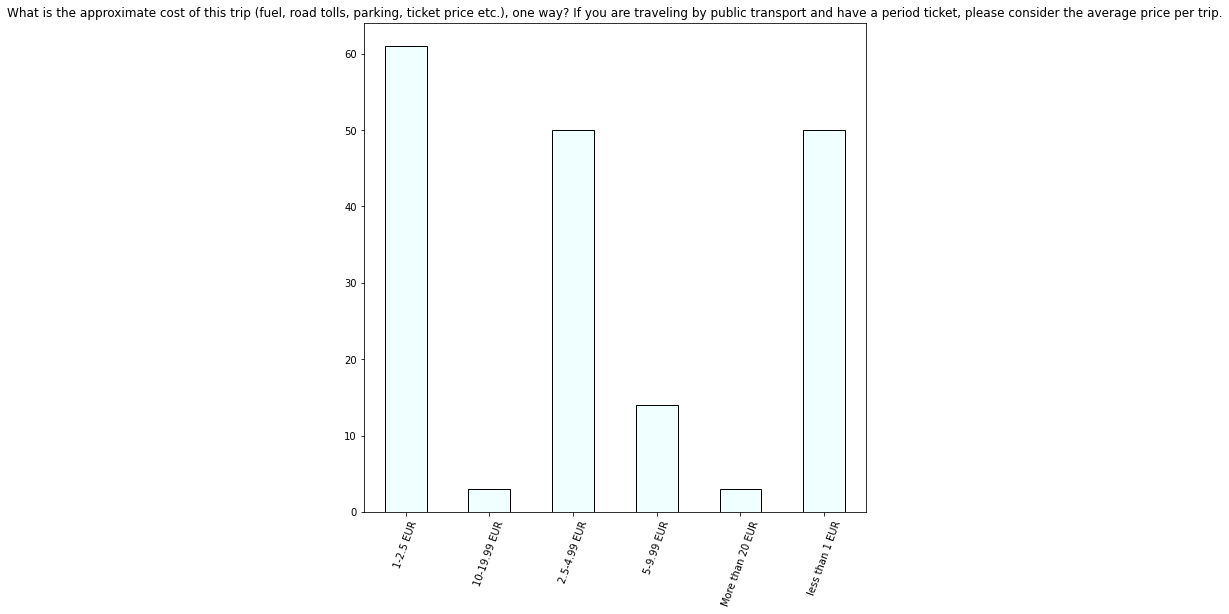

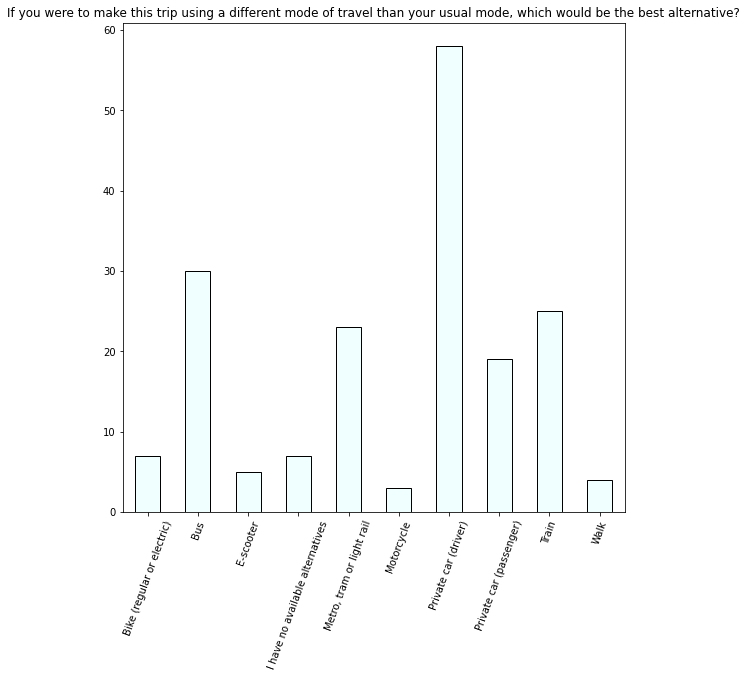

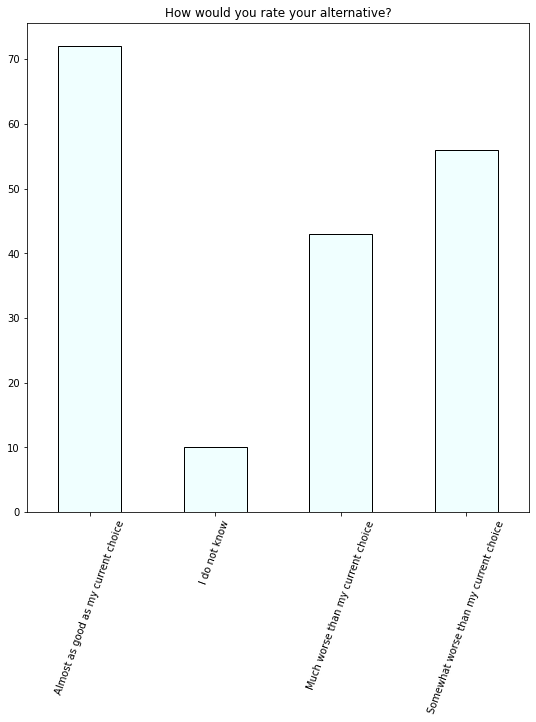

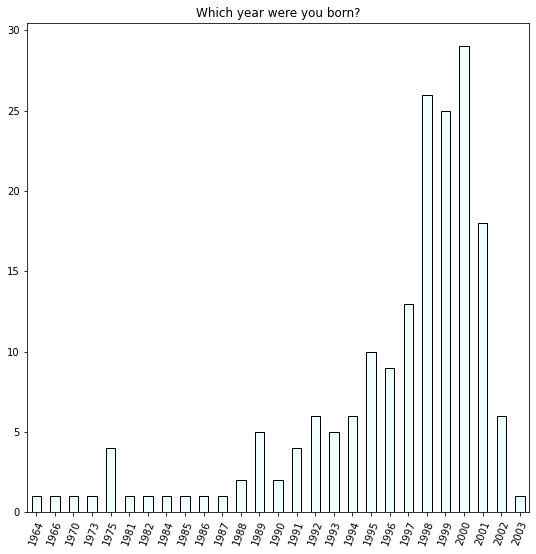

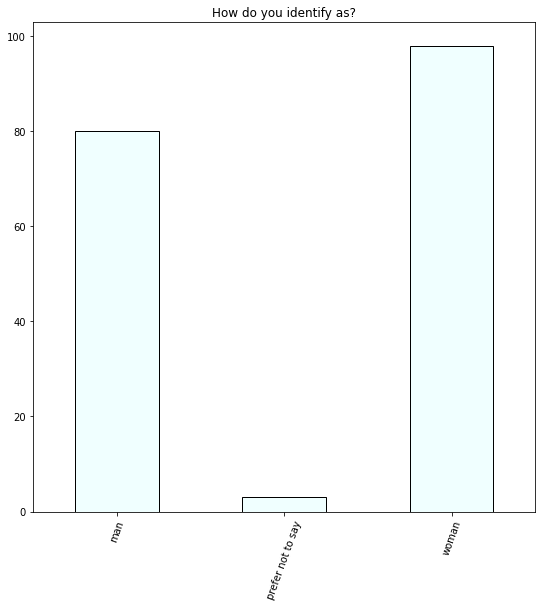

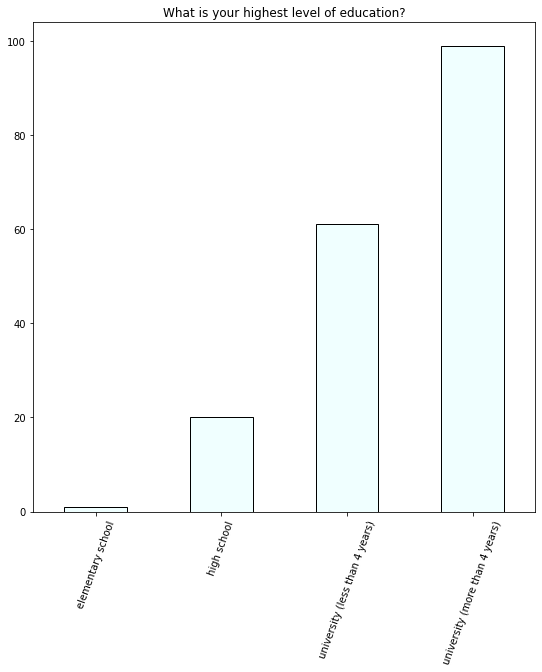

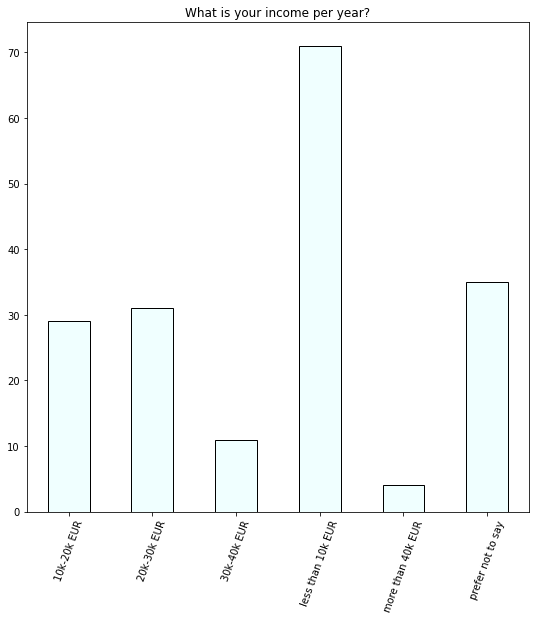

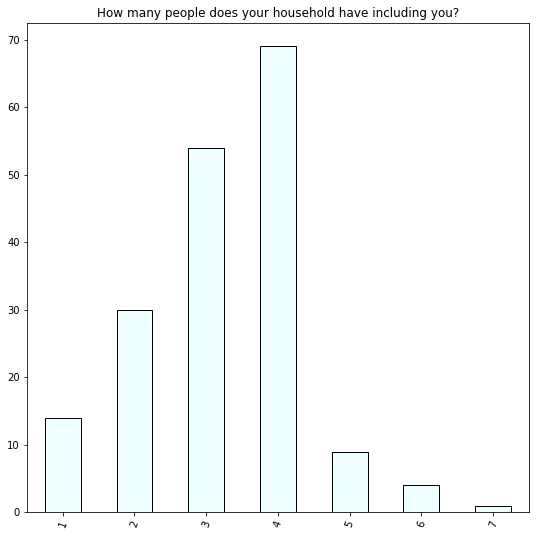

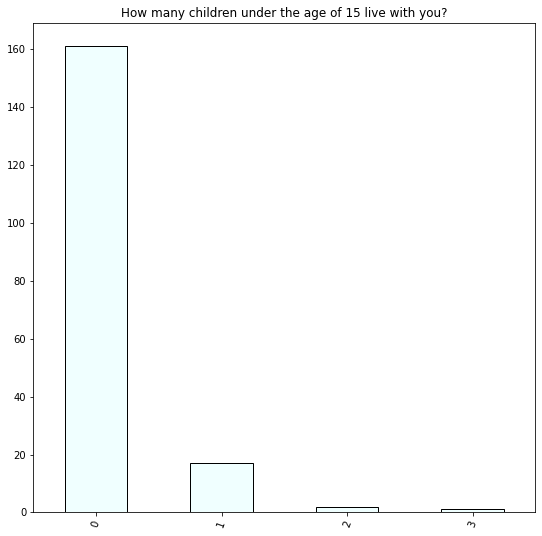

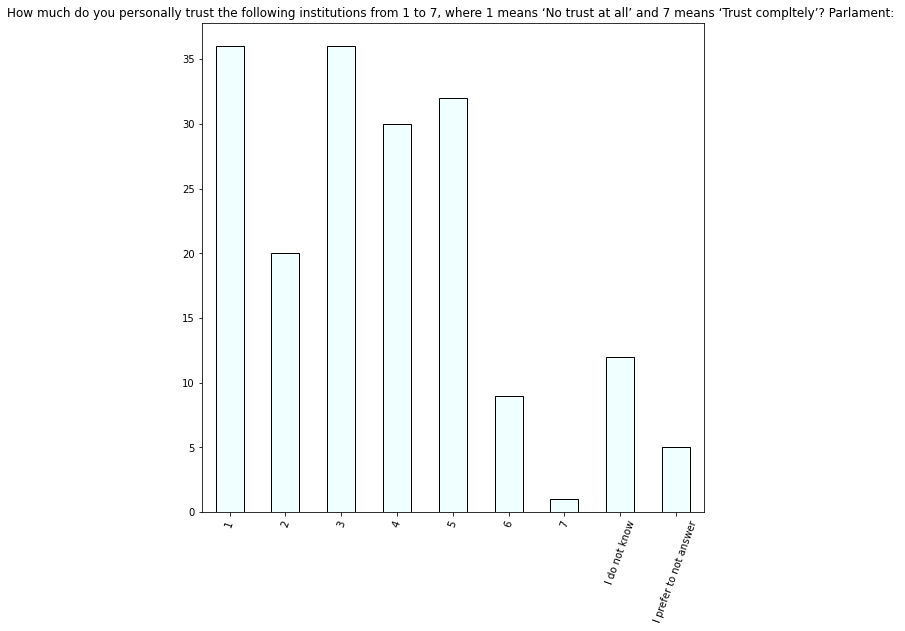

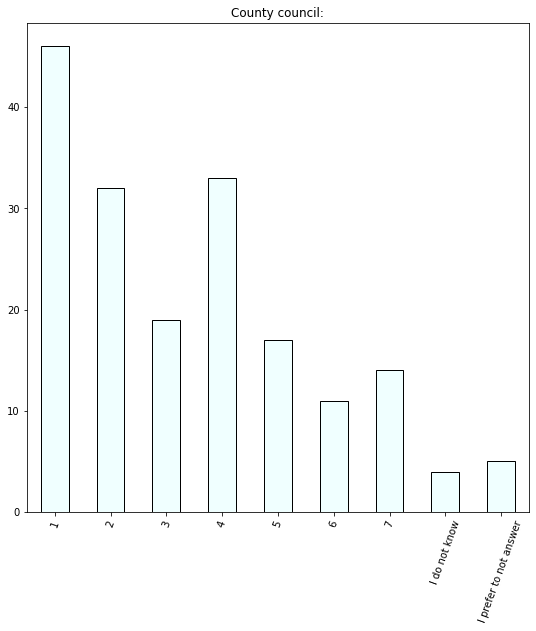

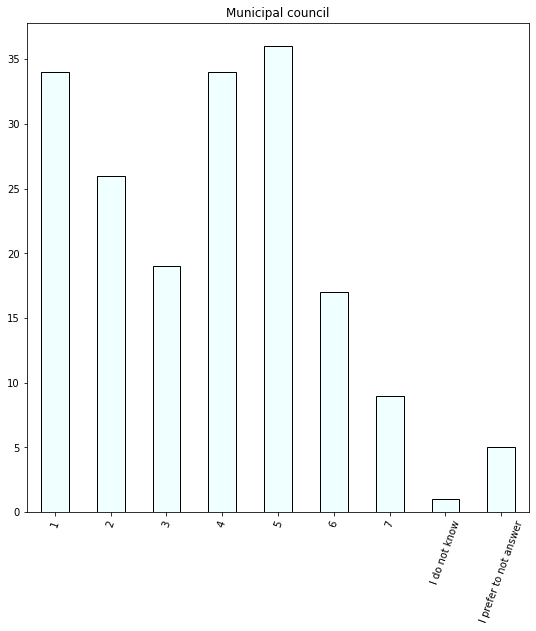

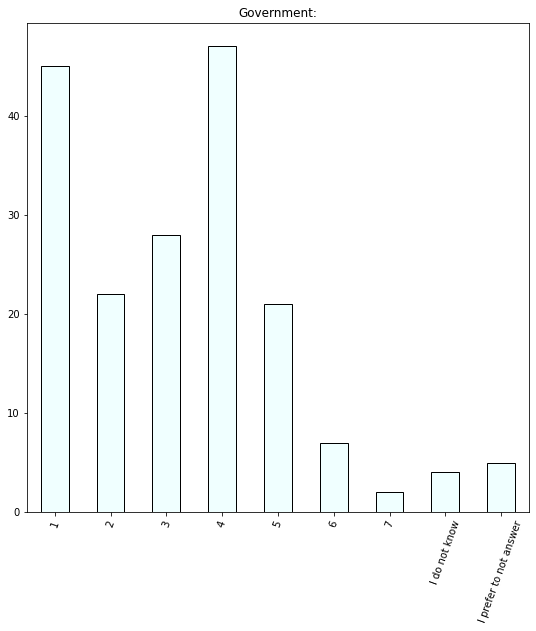

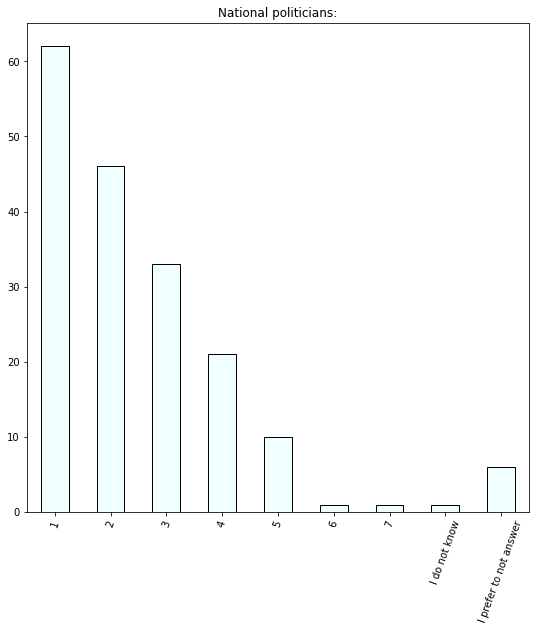

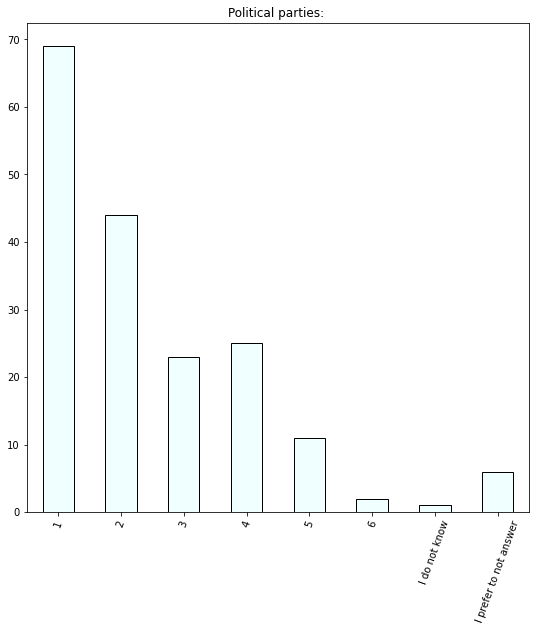

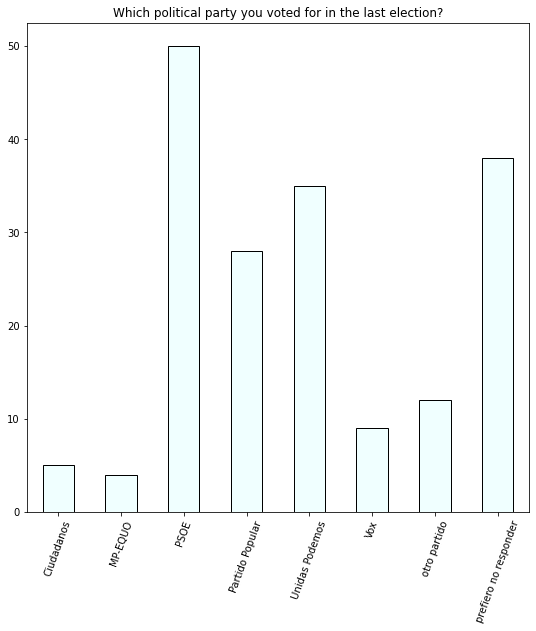

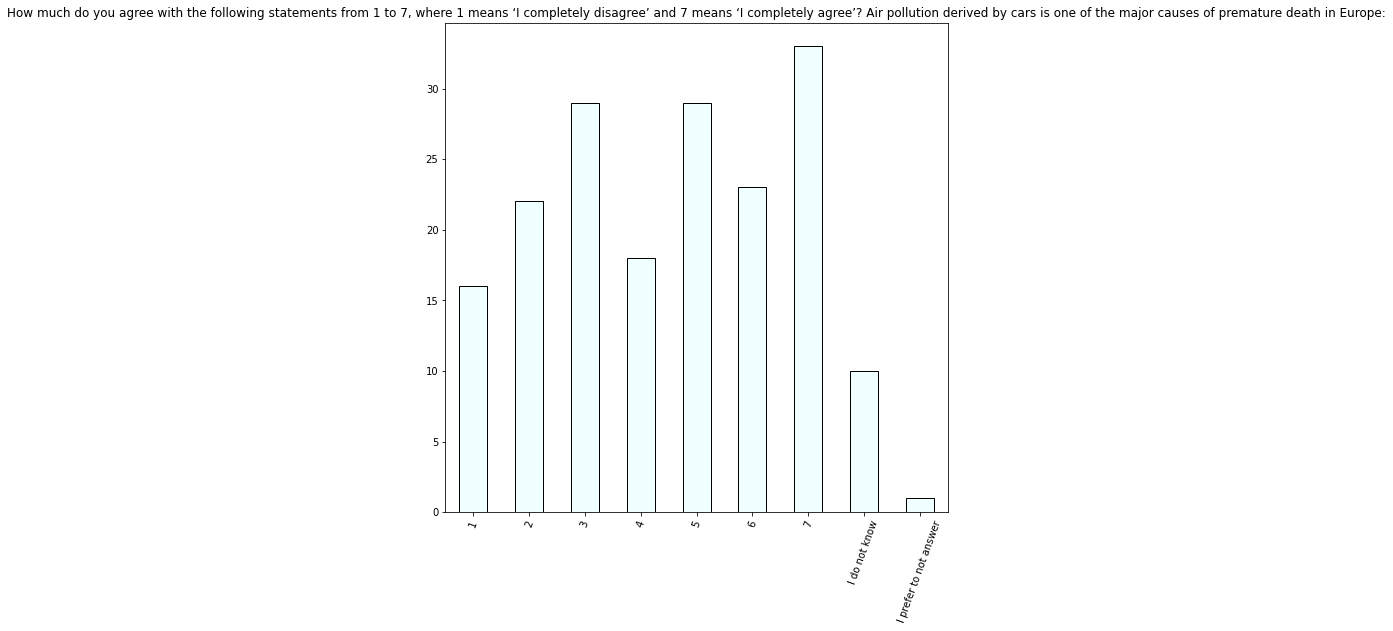

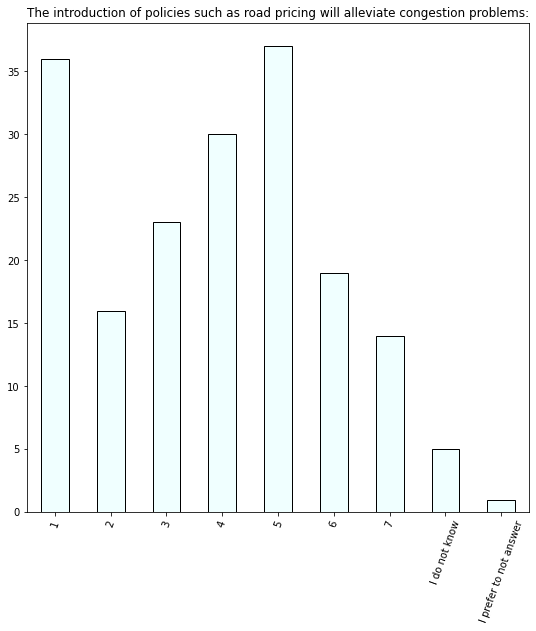

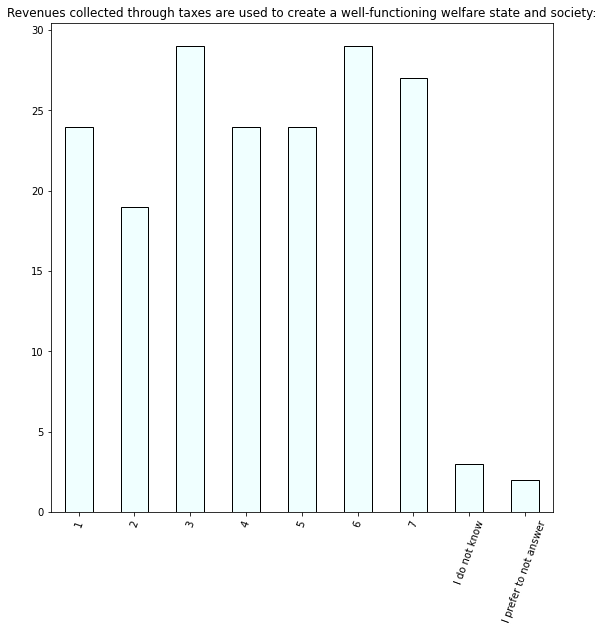

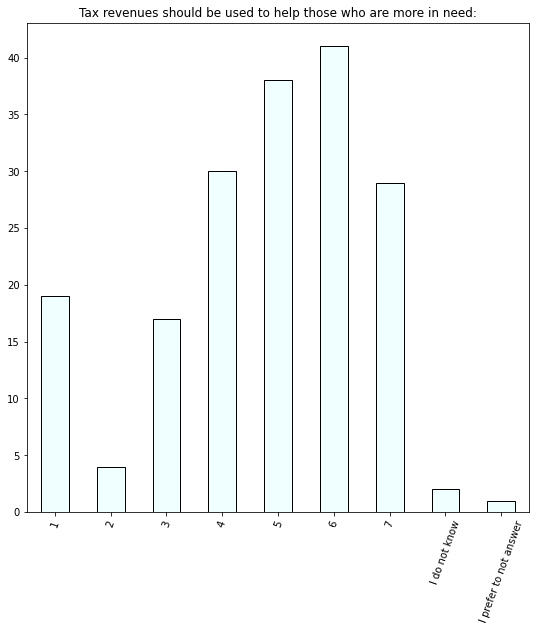

In [14]:
for i in [9,14,16,20,22,24,26,27,29,32,34,37,39,41,43,45,210,212,214,216,218,220,222,224,226,228,230,232,234,236,238,240,242]:
    column= df1.columns[i]
    
    df1.groupby([column]).count().plot(kind='bar', y=1, title=column, figsize=(9,9),color='azure', edgecolor='k', legend=False)
    plt.xticks(rotation=70)
    plt.xlabel('')
    #plt.axis().set_xlabel('')
    #plt.figure(figsize=(9,9))
    #plt.tight_layout(pad=2, w_pad=8, h_pad=2)
    #plt.savefig('Charts_all_parts%d.png' %i)
    plt.show()

In [ ]:
lst = ['Investments in public transport, walking and cycling','Investments in roads','Cash transfer for low-income citizens','Equal cash transfer','General budget']

bars1=df1.groupby([df1['Alternative 1']]).count()['mod'].loc[lst].tolist()
bars2=df1.groupby([df1['Alternative 2']]).count()['mod'].loc[lst].tolist()
bars3=df1.groupby([df1['Alternative 3']]).count()['mod'].loc[lst].tolist()
bars4=df1.groupby([df1['Alternative 4']]).count()['mod'].loc[lst].tolist()
bars5=df1.groupby([df1['Alternative 5']]).count()['mod'].loc[lst].tolist()

bars12=np.add(bars1, bars2).tolist()
bars123=np.add(bars12,bars3).tolist()
bars1234=np.add(bars123,bars4).tolist()

# The position of the bars on the x-axis
r = [0,1,2,3,4]
 
# Names of group and bar width
names = ['Investments in public\n transport, walking\n and cycling','Investments\n in roads','Cash transfer\n for low-income\n citizens','Equal cash transfer','General budget']

fig, ax = plt.subplots(figsize=(15,8))

ax.bar(r, bars1,  width=0.9, label=('Alternative 1'))
ax.bar(r, bars2, bottom=bars1,  width=0.9, label=('Alternative 2'))
ax.bar(r, bars3, bottom=bars12,  width=0.9, label=('Alternative 3'))
ax.bar(r, bars4, bottom=bars123, width=0.9, label=('Alternative 4'))
ax.bar(r, bars5, bottom=bars1234,  width=0.9, label=('Alternative 5'))

for i in range(5):
    plt.text(i, bars1[i]/2, '%s'%(int(df1.groupby([df1['Alternative 1']]).count()['mod'].loc[lst][i]/1.81)) + '%', va = 'center', ha = 'center', fontsize = 10)
    plt.text(i, bars1[i]+bars2[i]/2, '%s'%(int(df1.groupby([df1['Alternative 2']]).count()['mod'].loc[lst][i]/1.81))  + '%', va = 'center', ha = 'center',  fontsize = 10)
    plt.text(i, bars12[i]+bars3[i]/2, '%s'%(int(df1.groupby([df1['Alternative 3']]).count()['mod'].loc[lst][i]/1.81))  + '%', va = 'center', ha = 'center',  fontsize = 10)
    plt.text(i, bars123[i]+bars4[i]/2, '%s'%(int(df1.groupby([df1['Alternative 4']]).count()['mod'].loc[lst][i]/1.81))  + '%', va = 'center', ha = 'center', fontsize = 10)
    plt.text(i, bars1234[i]+bars5[i]/2, '%s'%(int(df1.groupby([df1['Alternative 5']]).count()['mod'].loc[lst][i]/1.81))  + '%', va = 'center', ha = 'center',  fontsize = 10)


plt.xticks(r, names,fontsize=15)
plt.ylabel('Percentage for each alternative',fontsize=15)
ax.set_yticks(np.linspace(0,181,5))
ax.set_yticklabels(np.linspace(0,100,5),fontsize=15) 
plt.legend(fontsize=15)

#plt.savefig('Alteratives_Madrid.pdf')
 
plt.show()

In [ ]:
mean=(df1.groupby([df1['Alternative 1']]).count()['mod']+2*df1.groupby([df1['Alternative 2']]).count()['mod']+3*df1.groupby([df1['Alternative 3']]).count()['mod']+4*df1.groupby([df1['Alternative 4']]).count()['mod']+5*df1.groupby([df1['Alternative 5']]).count()['mod'])/15
mean/15

In [ ]:
lst=['A', 'B', 'C', 'D', 'E','I do not know']

fig=plt.figure(figsize=(10,6))
barWidth = 0.25

bars1=df1.groupby([df1['What type of society do you think is Spain today – which diagram comes the closest?']]).count()['mod'].loc[lst].tolist()
bars2=df1.groupby([df1['What do you think Spain ought to be like – which would you prefer?']]).count()['mod'].loc[lst].tolist()
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='What type of society do you think is Spain today?')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='What do you think Spain ought to be like?')
 
plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E','I do not know'], fontsize=13)
plt.yticks(fontsize=11)
plt.legend()

#plt.savefig("table_all.pdf")
plt.show()

In [37]:
new=df1.groupby(['By which mode do you travel with during this trip? If you travel with multiple modes choose the mode that takes you the longest time.','If you were to make this trip using a different mode of travel than your usual mode, which would be the best alternative?'])

In [38]:
chord=new.size().reset_index(name="Time")

In [5]:
#chord.to_excel("chord.xlsx") 

In [6]:
chord

,By which mode do you travel with during this trip? If you travel with multiple modes choose the mode that takes you the longest time.,"If you were to make this trip using a different mode of travel than your usual mode, which would be the best alternative?",Time
0,Bike (regular or electric),Bus,2
1,Bike (regular or electric),E-scooter,2
2,Bike (regular or electric),"Metro, tram or light rail",2
3,Bike (regular or electric),Motorcycle,2
4,Bike (regular or electric),Private car (driver),2
5,Bike (regular or electric),Walk,2
6,Bus,I have no available alternatives,1
7,Bus,"Metro, tram or light rail",9
8,Bus,Private car (driver),17
9,Bus,Private car (passenger),10


In [39]:
chord=chord.replace('Bike (regular or electric)', 'Slow')
chord=chord.replace('Walk', 'Slow')
chord=chord.replace('E-scooter', 'Slow')
chord=chord.replace('Bus', 'Bus, metro, tram or light rail')
chord=chord.replace('Metro, tram or light rail', 'Bus, metro, tram or light rail')
chord=chord.replace('Private car (passenger)', 'Private car / motorcycle')
chord=chord.replace('Private car (driver)', 'Private car / motorcycle')
chord=chord.replace('Motorcycle', 'Private car / motorcycle')
chord=chord.replace('I have no available alternatives', 'I have no available alternatives / other')
chord=chord.replace('Other', 'I have no available alternatives / other')

In [40]:
chord

,By which mode do you travel with during this trip? If you travel with multiple modes choose the mode that takes you the longest time.,"If you were to make this trip using a different mode of travel than your usual mode, which would be the best alternative?",Time
0,Slow,"Bus, metro, tram or light rail",2
1,Slow,Slow,2
2,Slow,"Bus, metro, tram or light rail",2
3,Slow,Private car / motorcycle,2
4,Slow,Private car / motorcycle,2
5,Slow,Slow,2
6,"Bus, metro, tram or light rail",I have no available alternatives / other,1
7,"Bus, metro, tram or light rail","Bus, metro, tram or light rail",9
8,"Bus, metro, tram or light rail",Private car / motorcycle,17
9,"Bus, metro, tram or light rail",Private car / motorcycle,10


In [41]:
chord_new=chord.groupby(['By which mode do you travel with during this trip? If you travel with multiple modes choose the mode that takes you the longest time.','If you were to make this trip using a different mode of travel than your usual mode, which would be the best alternative?'])

In [42]:
chord1=chord_new.size().reset_index(name="Time")

In [43]:
chord1

,By which mode do you travel with during this trip? If you travel with multiple modes choose the mode that takes you the longest time.,"If you were to make this trip using a different mode of travel than your usual mode, which would be the best alternative?",Time
0,"Bus, metro, tram or light rail","Bus, metro, tram or light rail",3
1,"Bus, metro, tram or light rail",I have no available alternatives / other,2
2,"Bus, metro, tram or light rail",Private car / motorcycle,5
3,"Bus, metro, tram or light rail",Slow,4
4,"Bus, metro, tram or light rail",Train,2
5,I have no available alternatives / other,"Bus, metro, tram or light rail",2
6,Private car / motorcycle,"Bus, metro, tram or light rail",5
7,Private car / motorcycle,I have no available alternatives / other,2
8,Private car / motorcycle,Private car / motorcycle,7
9,Private car / motorcycle,Slow,3


In [44]:
chord1.to_excel("chord1.xlsx")